In [ ]:
import pandas as pd
import numpy as  np

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 30.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from datasets import load_dataset
dataset=load_dataset('syntaxnoob/weather-prediction-prototype-aws')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/284024 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/31586 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['timestamp_1', 'code_1', 'air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1', 'wind_speed_1', 'wind_direction_1', 'timestamp_2', 'tar_timestamp_1', 'tar_timestamp_2', 'code_2', 'tar_code_1', 'tar_code_2', 'air_pressure_2', 'tar_air_pressure_1', 'tar_air_pressure_2', 'air_temperature_2', 'tar_air_temperature_1', 'tar_air_temperature_2', 'relative_humidity_2', 'tar_relative_humidity_1', 'tar_relative_humidity_2', 'precipitation_2', 'tar_precipitation_1', 'tar_precipitation_2', 'wind_speed_2', 'tar_wind_speed_1', 'tar_wind_speed_2', 'wind_direction_2', 'tar_wind_direction_1', 'tar_wind_direction_2'],
        num_rows: 284024
    })
    test: Dataset({
        features: ['timestamp_1', 'code_1', 'air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1', 'wind_speed_1', 'wind_direction_1', 'timestamp_2', 'tar_timestamp_1', 'tar_timestamp_2', 'code_2', 'tar_code_1', 'tar_code_2', 'air_pres

In [ ]:
train_dataset = dataset['train']

# Convert the dataset to a pandas DataFrame
df = train_dataset.to_pandas()

# Save the DataFrame to CSV
df.to_csv('weather_data.csv', index=False)

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5d83e47f3980af096d3a98e6db2551ce2fc2726358ab935aa65d1bf7fddd71de
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [ ]:
spark = SparkSession.builder \
    .appName("WeatherPredictionEDA") \
    .getOrCreate()

In [ ]:
file_path = "weather_data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- timestamp_1: timestamp (nullable = true)
 |-- code_1: integer (nullable = true)
 |-- air_pressure_1: double (nullable = true)
 |-- air_temperature_1: double (nullable = true)
 |-- relative_humidity_1: double (nullable = true)
 |-- precipitation_1: double (nullable = true)
 |-- wind_speed_1: double (nullable = true)
 |-- wind_direction_1: double (nullable = true)
 |-- timestamp_2: timestamp (nullable = true)
 |-- tar_timestamp_1: timestamp (nullable = true)
 |-- tar_timestamp_2: timestamp (nullable = true)
 |-- code_2: double (nullable = true)
 |-- tar_code_1: double (nullable = true)
 |-- tar_code_2: double (nullable = true)
 |-- air_pressure_2: double (nullable = true)
 |-- tar_air_pressure_1: double (nullable = true)
 |-- tar_air_pressure_2: double (nullable = true)
 |-- air_temperature_2: double (nullable = true)
 |-- tar_air_temperature_1: double (nullable = true)
 |-- tar_air_temperature_2: double (nullable = true)
 |-- relative_humidity_2: double (nullable = true)
 |-- 

In [ ]:
df.show(10)

+-------------------+------+------------------+------------------+-------------------+---------------+------------------+------------------+-------------------+-------------------+-------------------+------+----------+----------+------------------+------------------+------------------+------------------+---------------------+---------------------+-------------------+-----------------------+-----------------------+---------------+-------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|        timestamp_1|code_1|    air_pressure_1| air_temperature_1|relative_humidity_1|precipitation_1|      wind_speed_1|  wind_direction_1|        timestamp_2|    tar_timestamp_1|    tar_timestamp_2|code_2|tar_code_1|tar_code_2|    air_pressure_2|tar_air_pressure_1|tar_air_pressure_2| air_temperature_2|tar_air_temperature_1|tar_air_temperature_2|relative_humidity_2|tar_relative_humidity_1|tar_relative_hu

In [ ]:
summary_stats = df.describe().toPandas()
summary_stats

,summary,code_1,air_pressure_1,air_temperature_1,relative_humidity_1,precipitation_1,wind_speed_1,wind_direction_1,code_2,tar_code_1,...,tar_relative_humidity_2,precipitation_2,tar_precipitation_1,tar_precipitation_2,wind_speed_2,tar_wind_speed_1,tar_wind_speed_2,wind_direction_2,tar_wind_direction_1,tar_wind_direction_2
0,count,284024,284024,284024,284024,284024,284024,284024,284024,284024,...,284024,284024,284024,284024,284024,284024,284024,284024,284024,284024
1,mean,0.5744901839281188,0.5711173922532323,0.4498387157254519,0.7481783034959497,8.845625844447227E-4,0.21574615385110116,0.4891723312896904,0.4225452778638425,0.5744866630988931,...,0.7468034464046135,9.567940521491253E-4,8.844300933100971E-4,9.568193236062852E-4,0.2010623021828747,0.21574305496497403,0.20106471792303265,0.48688294631596096,0.48917583158074573,0.486878248942969
2,stddev,0.4944209473438199,0.17317828390029769,0.1298663725935148,0.1725437210787605,0.007269424978004836,0.12522999309320013,0.2656765085457286,0.4939652063727413,0.4944214777861548,...,0.18118359822845378,0.007645024738965231,0.0072691101144143665,0.00764502679717351,0.12113897784500252,0.12523070680283835,0.12113870363783946,0.265012984238855,0.26567639386773356,0.26501570508841754
3,min,0,0.0091701054562127,0.0,0.0390801993656547,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,1,1.0,1.0,1.0,0.837630662020906,1.0,1.0,1.0,1.0,...,1.0,1.0,0.837630662020906,1.0,0.9841966637401228,1.0,0.9841966637401228,1.0,1.0,1.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('weather_data.csv')

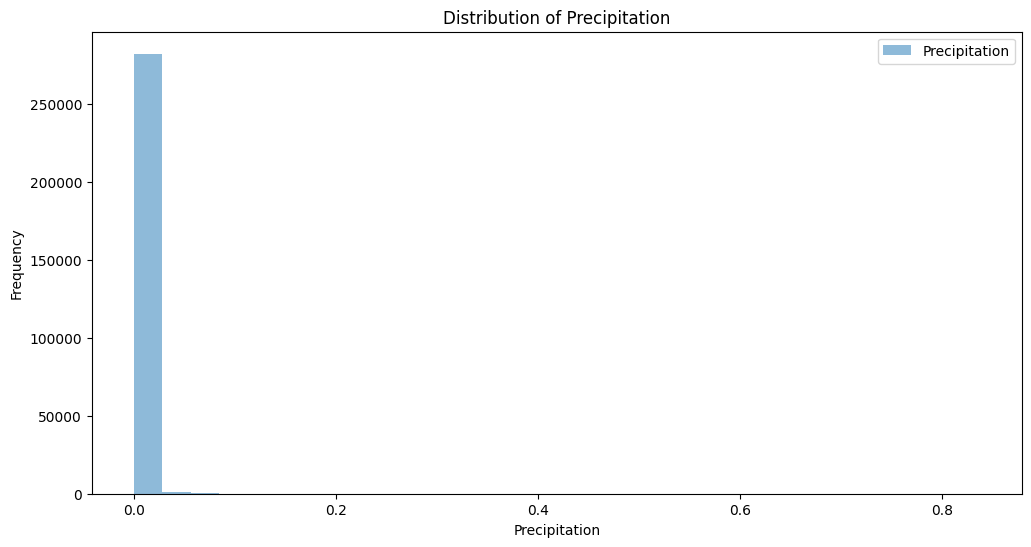

In [ ]:
# Plotting the distribution of precipitation
plt.figure(figsize=(12, 6))
plt.hist(df['precipitation_1'], bins=30, alpha=0.5, label='Precipitation')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Conclusion:The data contains weather information of a region when there is no rain or snowfall

In [ ]:
numerical_cols = ['air_pressure_1', 'air_temperature_1', 'relative_humidity_1', 'precipitation_1',
                  'wind_speed_1', 'wind_direction_1']

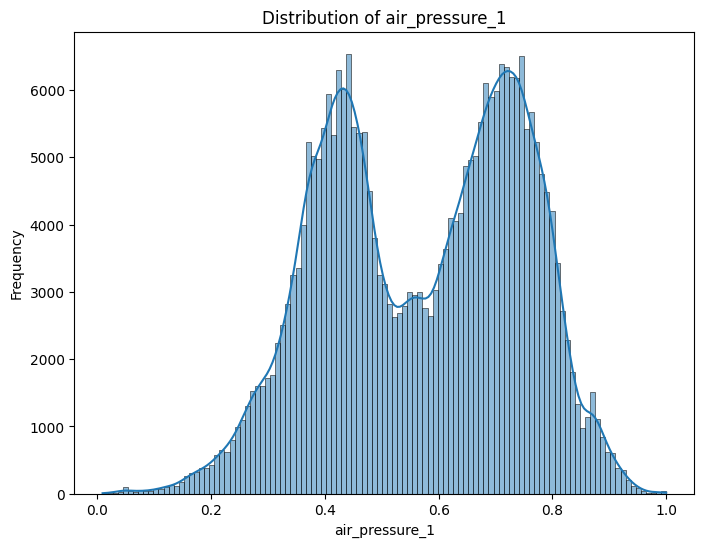

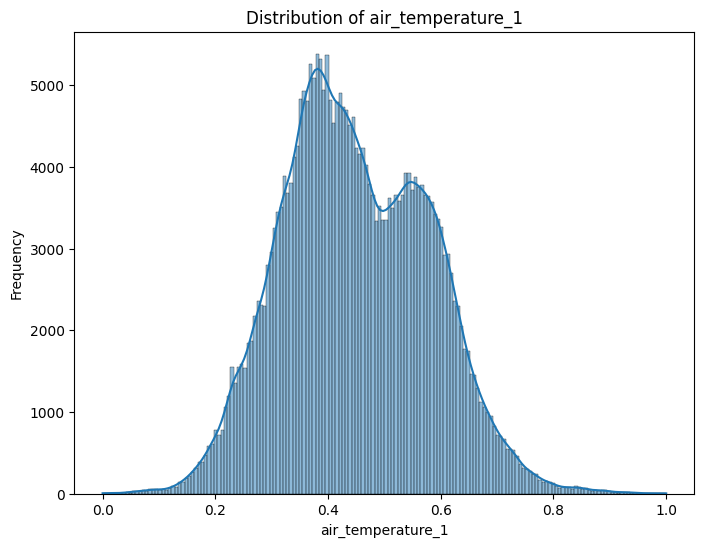

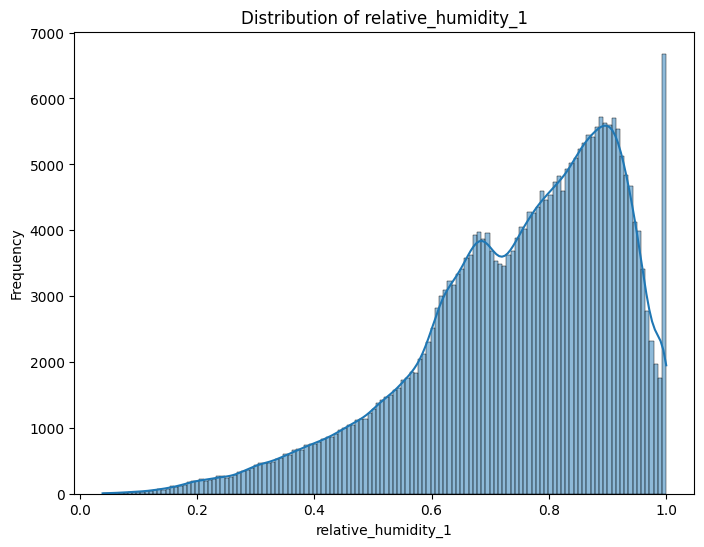

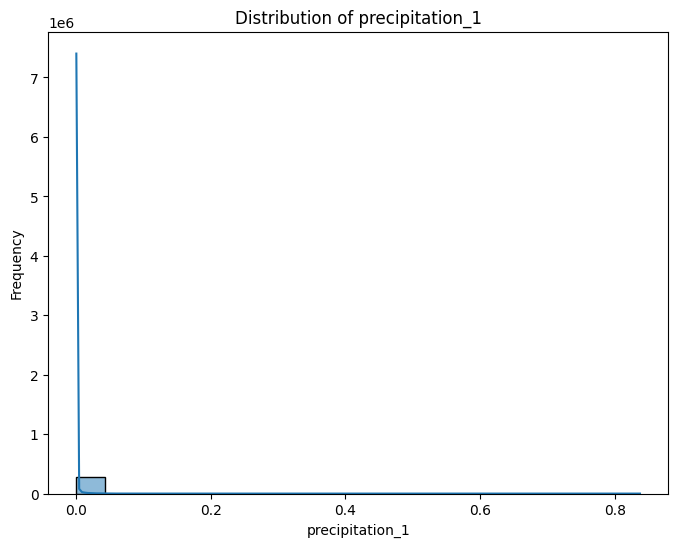

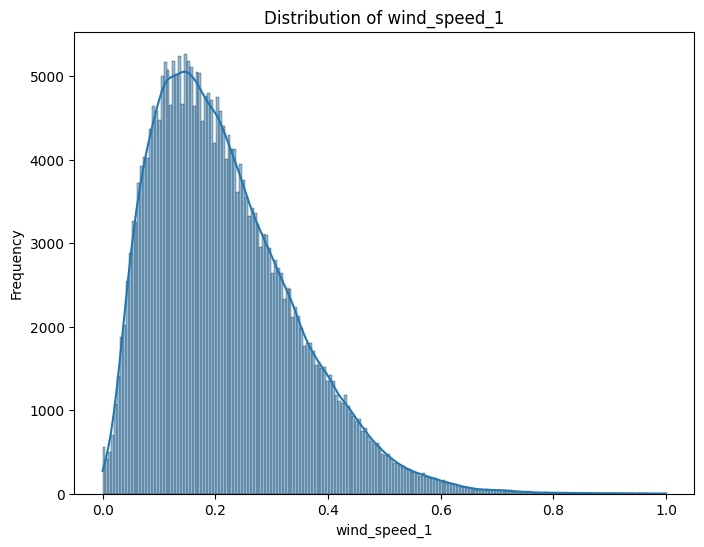

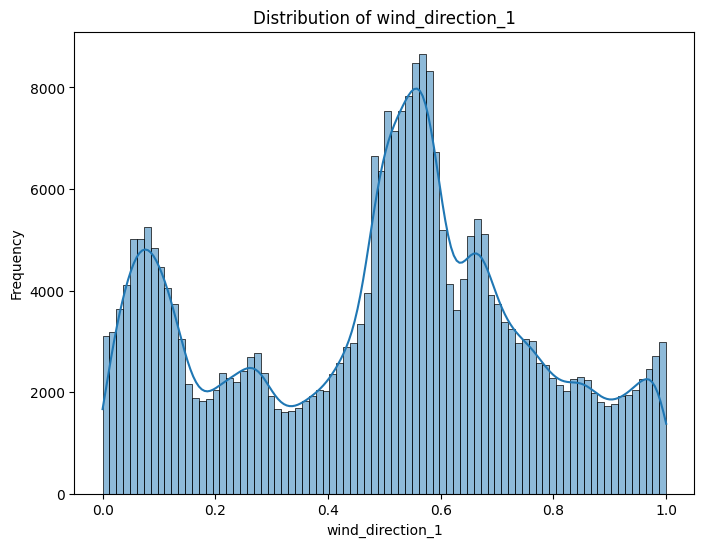

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Conclusion:The histogram of various features of timestamp1 is either skewed heavily or is bimodal or multimodal

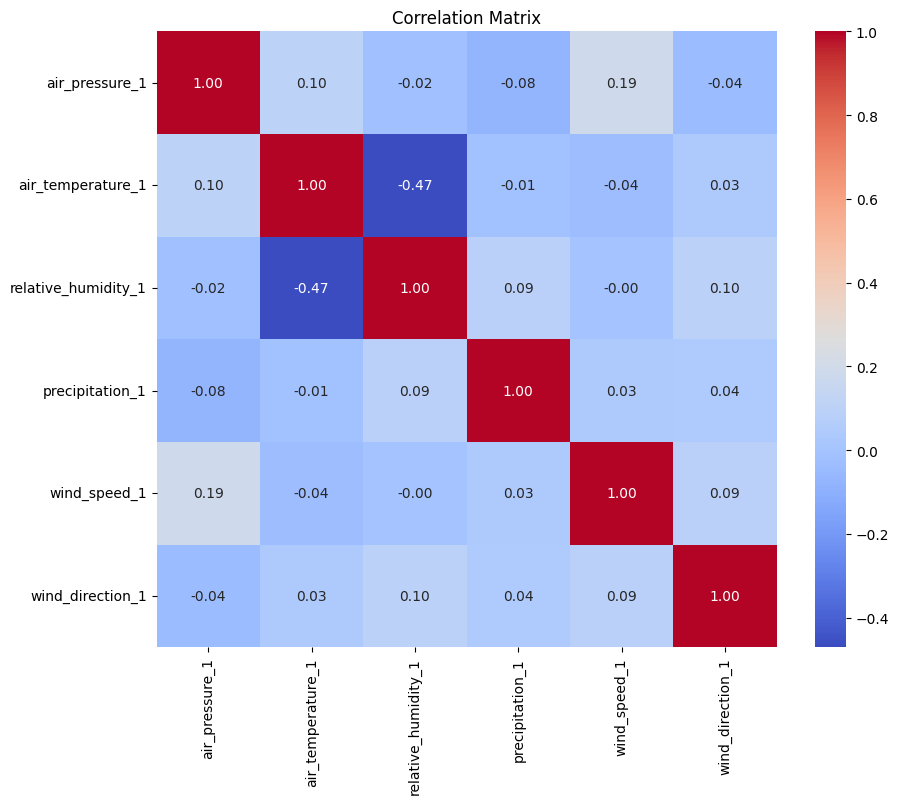

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Conclusion:The correlation matrix does not show significant relation between any two features apart from air temperature and relative humidity which is moderately negatively correlated.

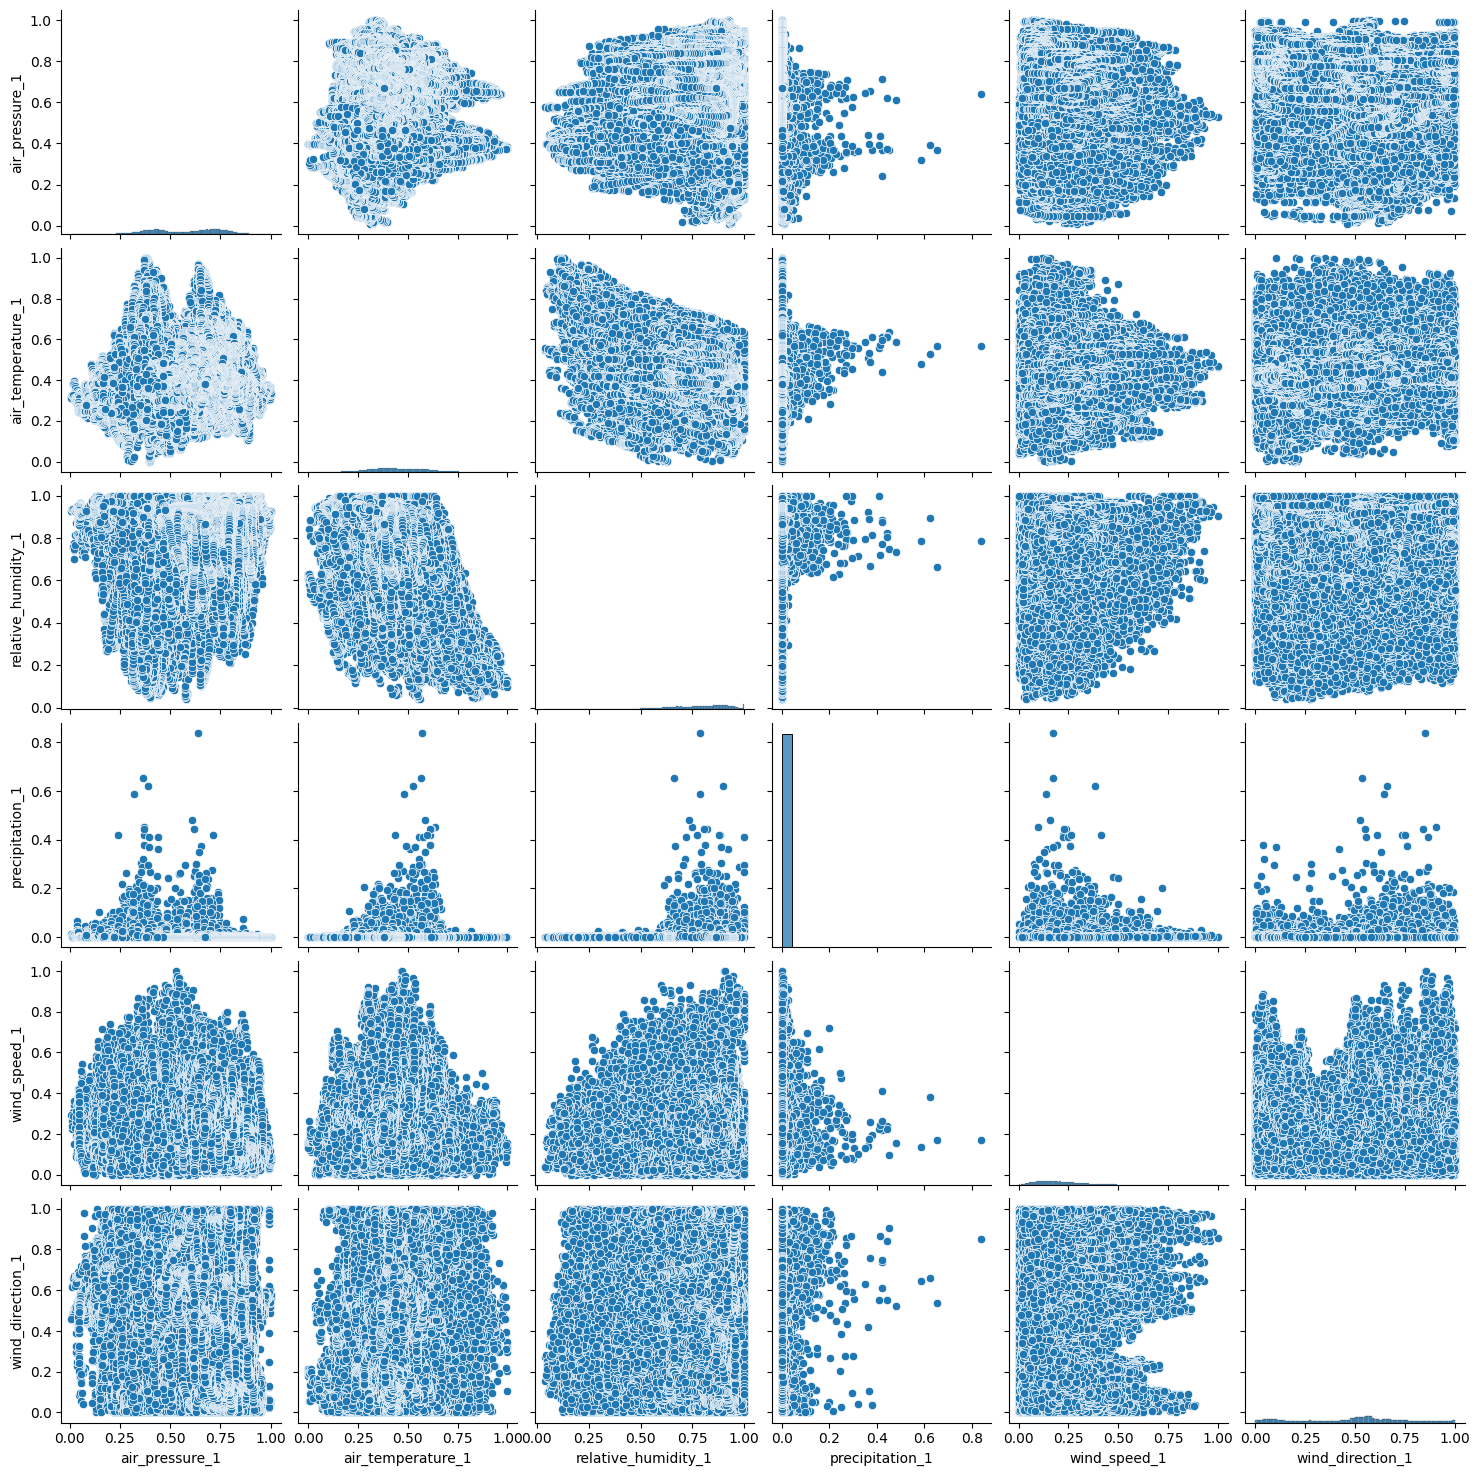

In [ ]:
sns.pairplot(df[numerical_cols])
plt.show()

Conclusion:While most of the pairplot does not signify any particular trend between two variables,some indicate a small trend like lower percipitation value for different values of all other features.

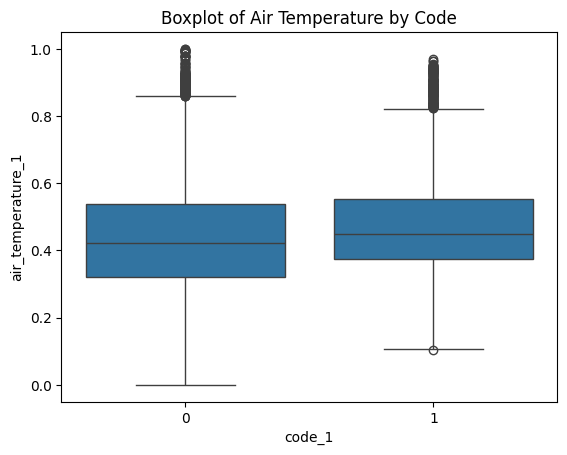

In [ ]:
sns.boxplot(x='code_1', y='air_temperature_1', data=df)
plt.title('Boxplot of Air Temperature by Code')
plt.show()

Conclusion:The five number summary of code 0 and code1areas for air temperature summary signify almost similar mean and code 0 area having varied temperature distribution compared to code1

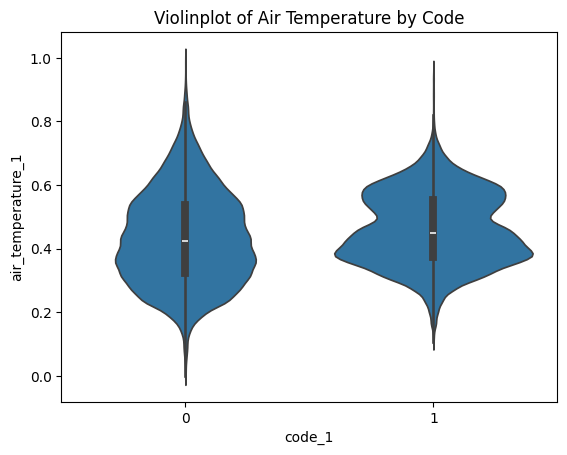

In [ ]:
sns.violinplot(x='code_1', y='air_temperature_1', data=df)
plt.title('Violinplot of Air Temperature by Code')
plt.show()

Conclusion:The air temperatures in Code0 tend to be slightly lower and less variable than in Code1.This implies whatever is represented by Code1 might be influencing air temperature readings or is associated with conditions that have a narrower range of temperatures.

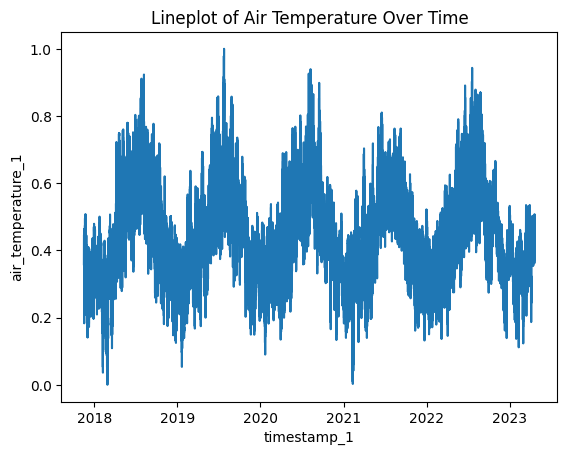

In [ ]:
sns.lineplot(x=df.index, y='air_temperature_1', data=df)
plt.title('Lineplot of Air Temperature Over Time')
plt.show()

Conclusion:The line plot provides a clear and intuitive visualization of how air temperature has varied over several years, highlighting seasonal cycles and potential year-to-year variations

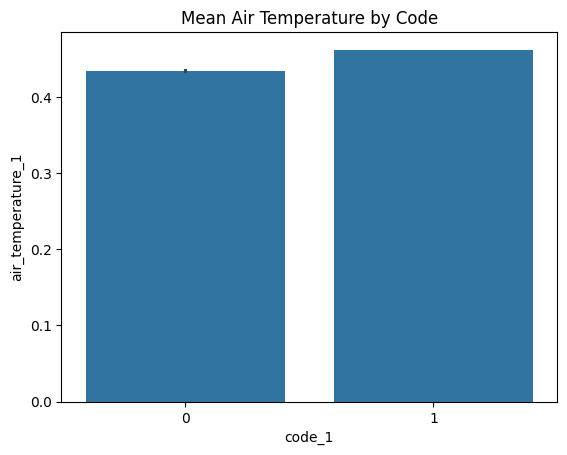

In [ ]:
sns.barplot(x='code_1', y='air_temperature_1', data=df, estimator=np.mean)
plt.title('Mean Air Temperature by Code')
plt.show()

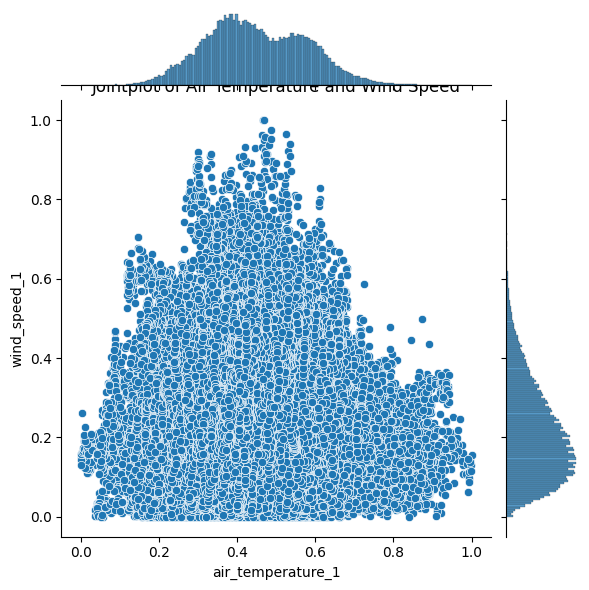

In [ ]:
sns.jointplot(x='air_temperature_1', y='wind_speed_1', data=df, kind='scatter')
plt.title('Jointplot of Air Temperature and Wind Speed')
plt.show()

# **Decision Tree Classifier**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import Row

In [ ]:
df = spark.createDataFrame(df)

In [ ]:
feature_columns = [col for col in df.columns if col.startswith("air") or col.startswith("relative_humidity") or col.startswith("precipitation") or col.startswith("wind_speed") or col.startswith("wind_direction")]

In [ ]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df)

In [ ]:
(training_data, test_data) = data.randomSplit([0.7, 0.3])

In [ ]:
dt = DecisionTreeClassifier(labelCol="tar_code_1", featuresCol="features")
model = dt.fit(training_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol="tar_code_1", predictionCol="prediction", metricName="accuracy")
predictions = model.transform(test_data)
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.421588


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

The ParamGridBuilder in PySpark's MLlib is a utility class used for grid search, which helps in systematically selecting the best combination of hyperparameters for a machine learning model.Here we are finding best hyper parameter for number of bins and maximum depth

In [ ]:
param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.maxBins, [20, 40, 60]) \
    .build()

In [ ]:
crossval = CrossValidator(estimator=dt,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)

In [ ]:
cv_model = crossval.fit(training_data)

In [ ]:
predictions = cv_model.transform(test_data)
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.421282


In [ ]:
best_model = cv_model.bestModel
print("Best Max Depth:", best_model.getMaxDepth())
print("Best Max Bins:", best_model.getMaxBins())

Best Max Depth: 5
Best Max Bins: 20


Conclusion:The best maximum depth is obtained at length of 5 and maximun number of bins is 20

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

In [ ]:
feature_columns = [col for col in df.columns if col.startswith("air") or col.startswith("relative_humidity") or col.startswith("precipitation") or col.startswith("wind_speed") or col.startswith("wind_direction")]

In [ ]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df)

In [ ]:
(training_data, test_data) = data.randomSplit([0.7, 0.3])

In [ ]:
rf = RandomForestClassifier(labelCol="tar_code_1", featuresCol="features", numTrees=10)
model = rf.fit(training_data)

In [ ]:
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="tar_code_1", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.424711
